In [1]:
#kütüphanelerin import edilmesi ve dosyanın Excel'den okunması
import numpy as np
import pandas as pd
df=pd.read_csv("bcm.csv")
print(df.head())

  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 claudin-low     1.0                   

In [2]:
#Veri setine genel bakış
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
Patient ID                        2509 non-null object
Age at Diagnosis                  2498 non-null float64
Type of Breast Surgery            1955 non-null object
Cancer Type                       2509 non-null object
Cancer Type Detailed              2509 non-null object
Cellularity                       1917 non-null object
Chemotherapy                      1980 non-null object
Pam50 + Claudin-low subtype       1980 non-null object
Cohort                            2498 non-null float64
ER status measured by IHC         2426 non-null object
ER Status                         2469 non-null object
Neoplasm Histologic Grade         2388 non-null float64
HER2 status measured by SNP6      1980 non-null object
HER2 Status                       1980 non-null object
Tumor Other Histologic Subtype    2374 non-null object
Hormone Therapy                   1980 non-null object
Inferred M

In [3]:
#Veri setindeki sayısal verilere genel bakış
print(df.describe())

       Age at Diagnosis       Cohort  Neoplasm Histologic Grade  \
count       2498.000000  2498.000000                2388.000000   
mean          60.420300     2.900320                   2.412060   
std           13.032997     1.962216                   0.649363   
min           21.930000     1.000000                   1.000000   
25%           50.920000     1.000000                   2.000000   
50%           61.110000     3.000000                   3.000000   
75%           70.000000     4.000000                   3.000000   
max           96.290000     9.000000                   3.000000   

       Lymph nodes examined positive  Mutation Count  \
count                    2243.000000     2357.000000   
mean                        1.950513        5.578702   
std                         4.017774        3.967967   
min                         0.000000        1.000000   
25%                         0.000000        3.000000   
50%                         0.000000        5.000000   
75% 

In [4]:
#Kullanılacak sütunların seçilmesi
df=df.loc[:,["Neoplasm Histologic Grade","Lymph nodes examined positive","Mutation Count","Nottingham prognostic index","Overall Survival (Months)","Relapse Free Status (Months)","Tumor Size","Tumor Stage","vital_status"]]
print(df.head())

   Neoplasm Histologic Grade  Lymph nodes examined positive  Mutation Count  \
0                        3.0                           10.0             NaN   
1                        3.0                            0.0             2.0   
2                        2.0                            1.0             2.0   
3                        2.0                            3.0             1.0   
4                        3.0                            8.0             2.0   

   Nottingham prognostic index  Overall Survival (Months)  \
0                        6.044                 140.500000   
1                        4.020                  84.633333   
2                        4.030                 163.700000   
3                        4.050                 164.933333   
4                        6.080                  41.366667   

   Relapse Free Status (Months)  Tumor Size  Tumor Stage     vital_status  
0                        138.65        22.0          2.0           Living  
1     

In [5]:
#Eksik veri kontrolü
print(df.isnull().sum())

Neoplasm Histologic Grade        121
Lymph nodes examined positive    266
Mutation Count                   152
Nottingham prognostic index      222
Overall Survival (Months)        528
Relapse Free Status (Months)     121
Tumor Size                       149
Tumor Stage                      721
vital_status                     529
dtype: int64


In [6]:
#Eksik verilerin silinmesi
df.dropna(inplace=True)
print(df.head())

   Neoplasm Histologic Grade  Lymph nodes examined positive  Mutation Count  \
1                        3.0                            0.0             2.0   
2                        2.0                            1.0             2.0   
3                        2.0                            3.0             1.0   
4                        3.0                            8.0             2.0   
5                        3.0                            0.0             4.0   

   Nottingham prognostic index  Overall Survival (Months)  \
1                        4.020                  84.633333   
2                        4.030                 163.700000   
3                        4.050                 164.933333   
4                        6.080                  41.366667   
5                        4.062                   7.800000   

   Relapse Free Status (Months)  Tumor Size  Tumor Stage     vital_status  
1                         83.52        10.0          1.0           Living  
2     

In [7]:
#Eksik veri kontrolü
print(df.isnull().sum())

Neoplasm Histologic Grade        0
Lymph nodes examined positive    0
Mutation Count                   0
Nottingham prognostic index      0
Overall Survival (Months)        0
Relapse Free Status (Months)     0
Tumor Size                       0
Tumor Stage                      0
vital_status                     0
dtype: int64


In [8]:
#İndekslerin sıfırlanması
df.reset_index(inplace=True,drop=True)

In [9]:
#Veri tipi kontrolü
df.dtypes

Neoplasm Histologic Grade        float64
Lymph nodes examined positive    float64
Mutation Count                   float64
Nottingham prognostic index      float64
Overall Survival (Months)        float64
Relapse Free Status (Months)     float64
Tumor Size                       float64
Tumor Stage                      float64
vital_status                      object
dtype: object

In [10]:
#output sınıfının çeşidinin gösterilmesi
print(df.vital_status.unique())

['Living' 'Died of Disease' 'Died of Other Causes']


In [11]:
#Output sınıfının Living=0, Died of Disease=2, Died of Other Causes=1 şeklinde değiştirilmesi 
df.vital_status=[0 if each =="Living" else 2 if each=="Died of Disease" else 1 for each in df.vital_status]
print(df.head())

   Neoplasm Histologic Grade  Lymph nodes examined positive  Mutation Count  \
0                        3.0                            0.0             2.0   
1                        2.0                            1.0             2.0   
2                        2.0                            3.0             1.0   
3                        3.0                            8.0             2.0   
4                        3.0                            0.0             4.0   

   Nottingham prognostic index  Overall Survival (Months)  \
0                        4.020                  84.633333   
1                        4.030                 163.700000   
2                        4.050                 164.933333   
3                        6.080                  41.366667   
4                        4.062                   7.800000   

   Relapse Free Status (Months)  Tumor Size  Tumor Stage  vital_status  
0                         83.52        10.0          1.0             0  
1           

In [12]:
#veri tekrarı kontrolü
print(df[df.duplicated()])

Empty DataFrame
Columns: [Neoplasm Histologic Grade, Lymph nodes examined positive, Mutation Count, Nottingham prognostic index, Overall Survival (Months), Relapse Free Status (Months), Tumor Size, Tumor Stage, vital_status]
Index: []


In [13]:
print(df.describe())

       Neoplasm Histologic Grade  Lymph nodes examined positive  \
count                1309.000000                    1309.000000   
mean                    2.442322                       1.870130   
std                     0.641872                       3.849215   
min                     1.000000                       0.000000   
25%                     2.000000                       0.000000   
50%                     3.000000                       0.000000   
75%                     3.000000                       2.000000   
max                     3.000000                      41.000000   

       Mutation Count  Nottingham prognostic index  Overall Survival (Months)  \
count     1309.000000                  1309.000000                1309.000000   
mean         5.471352                     4.118338                 127.629132   
std          3.808908                     1.061604                  78.424011   
min          1.000000                     2.002000                   0.1

In [14]:
#Normalizasyon
y=df.vital_status.values
x_data=df.drop(["vital_status"],axis=1).values
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [15]:
#Veri setinin train - test şeklinde ayrılması ve boyutları
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (916, 8)
y_train: (916,)
x_test: (393, 8)
y_test: (393,)


In [16]:
#Parametre eklenmeden yapılan MLP eğitimi
from sklearn.neural_network import MLPClassifier

mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)

C:\Users\ABBSCBN\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
#Genel değerlendirilmesi - Accuracy, F1 skoru, Karışıklık Matrisi 
import sklearn.metrics as metrics

y_pred=mlpc.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
cr=metrics.classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.5877862595419847
[[146   0  47]
 [ 62   0  29]
 [ 24   0  85]]
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       193
           1       0.00      0.00      0.00        91
           2       0.53      0.78      0.63       109

   micro avg       0.59      0.59      0.59       393
   macro avg       0.39      0.51      0.44       393
weighted avg       0.46      0.59      0.51       393



C:\Users\ABBSCBN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
#Kfold cross validation ile veri seti analizi. K=3
from sklearn.model_selection import KFold

scores=[]

kf=KFold(n_splits=3,random_state=1)
mlpc=MLPClassifier(solver="sgd",activation="relu",hidden_layer_sizes=(3,5,3),max_iter=1000)

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

0.5606407322654462
0.6077981651376146
0.5894495412844036
ortalama score: 0.5859628128958215


In [19]:
#Kfold cross validation ile veri seti analizi. K=10
from sklearn.model_selection import KFold

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(alpha=0.01,solver="lbfgs",activation="relu",hidden_layer_sizes=(10,10,10),max_iter=200)

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

0.7404580152671756
0.6259541984732825
0.7099236641221374
0.6717557251908397
0.7786259541984732
0.549618320610687
0.6641221374045801
0.6412213740458015
0.5648854961832062
0.4230769230769231
ortalama score: 0.6369641808573107


In [20]:
#grid search cv ile en iyi parametrelerin belirlenmesi cv=3
from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(10,10,10),(3,3,3),(100,100)],
            "solver":["lbfgs","adam","sgd"],
            "max_iter":[20,200,2000]
            }

mlpc=MLPClassifier(activation="relu",random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=3,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.6min finished
C:\Users\ABBSCBN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
#cv=3 için en iyi parametrelerin gösterimi
print(mlpc_cv_model.best_params_)

{'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'max_iter': 200, 'solver': 'lbfgs'}


In [22]:
#belirlenen parametrelerle model sonucu
mlpc1=MLPClassifier(alpha=0.0001,hidden_layer_sizes=(10,10,10),solver="lbfgs",max_iter=200,random_state=1)
mlpc1.fit(x_train,y_train)
print("score:",mlpc1.score(x_test,y_test))

score: 0.6717557251908397


In [23]:
#Modelin yeni parametrelerle değerlendirilmesi - Accuracy, F1 skoru, Karışıklık Matrisi 
import sklearn.metrics as metrics

y_pred=mlpc1.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
cr=metrics.classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.6717557251908397
[[163   6  24]
 [ 69  11  11]
 [ 14   5  90]]
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       193
           1       0.50      0.12      0.19        91
           2       0.72      0.83      0.77       109

   micro avg       0.67      0.67      0.67       393
   macro avg       0.63      0.60      0.57       393
weighted avg       0.64      0.67      0.62       393



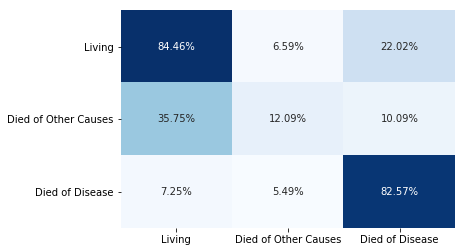

In [25]:
#Seaborn kütüphanesi tanımlanması
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
class_adlari=["Living","Died of Other Causes","Died of Disease"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

In [27]:
#Keras kütüphaneleri import edilmesi
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
import matplotlib.pyplot as plt
from keras.optimizers import SGD

In [28]:
#modelin train - test çin ayrılması
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
#Eğitilen veri boyutunun gösterilmesi
input_shape=x_train.shape[1:]
print(input_shape)

(8,)


In [36]:
#Model katmanlarının eğitilmesi
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=8))
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [37]:
#modelin compile edilmesi
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [38]:
#modelin fit edilmesi iterasyon sayı=1000
egitim=model.fit(x_train,y_train,epochs=1000,batch_size=128,validation_data=(x_test,y_test))

Train on 1047 samples, validate on 262 samples
Epoch 1/1000
1047/1047 [==============================] - 0s - loss: 2.2706 - acc: 0.2283 - val_loss: 2.2435 - val_acc: 0.3321
Epoch 2/1000
1047/1047 [==============================] - 0s - loss: 2.2225 - acc: 0.3448 - val_loss: 2.1918 - val_acc: 0.4924
Epoch 3/1000
1047/1047 [==============================] - 0s - loss: 2.1730 - acc: 0.3964 - val_loss: 2.1376 - val_acc: 0.4924
Epoch 4/1000
1047/1047 [==============================] - 0s - loss: 2.1208 - acc: 0.4088 - val_loss: 2.0819 - val_acc: 0.4924
Epoch 5/1000
1047/1047 [==============================] - 0s - loss: 2.0692 - acc: 0.4174 - val_loss: 2.0250 - val_acc: 0.4924
Epoch 6/1000
1047/1047 [==============================] - 0s - loss: 2.0161 - acc: 0.4164 - val_loss: 1.9660 - val_acc: 0.4924
Epoch 7/1000
1047/1047 [==============================] - 0s - loss: 1.9611 - acc: 0.4183 - val_loss: 1.9056 - val_acc: 0.4924
Epoch 8/1000
1047/1047 [==============================] - 0s - l

1047/1047 [==============================] - 0s - loss: 0.9646 - acc: 0.5712 - val_loss: 0.9857 - val_acc: 0.5458
Epoch 128/1000
1047/1047 [==============================] - 0s - loss: 0.9473 - acc: 0.6017 - val_loss: 0.9744 - val_acc: 0.5420
Epoch 129/1000
1047/1047 [==============================] - 0s - loss: 0.9621 - acc: 0.5922 - val_loss: 0.9831 - val_acc: 0.5458
Epoch 130/1000
1047/1047 [==============================] - 0s - loss: 0.9448 - acc: 0.5883 - val_loss: 0.9591 - val_acc: 0.5687
Epoch 131/1000
1047/1047 [==============================] - 0s - loss: 0.9496 - acc: 0.6017 - val_loss: 0.9919 - val_acc: 0.5267
Epoch 132/1000
1047/1047 [==============================] - 0s - loss: 0.9510 - acc: 0.5759 - val_loss: 0.9845 - val_acc: 0.5458
Epoch 133/1000
1047/1047 [==============================] - 0s - loss: 0.9444 - acc: 0.5960 - val_loss: 0.9582 - val_acc: 0.5649
Epoch 134/1000
1047/1047 [==============================] - 0s - loss: 0.9399 - acc: 0.5998 - val_loss: 0.9660 -

1047/1047 [==============================] - 0s - loss: 0.9089 - acc: 0.6074 - val_loss: 0.9541 - val_acc: 0.5573
Epoch 254/1000
1047/1047 [==============================] - 0s - loss: 0.9183 - acc: 0.6046 - val_loss: 0.9378 - val_acc: 0.5725
Epoch 255/1000
1047/1047 [==============================] - 0s - loss: 0.9220 - acc: 0.5912 - val_loss: 0.9346 - val_acc: 0.5763
Epoch 256/1000
1047/1047 [==============================] - 0s - loss: 0.9181 - acc: 0.6008 - val_loss: 0.9490 - val_acc: 0.5611
Epoch 257/1000
1047/1047 [==============================] - 0s - loss: 0.9073 - acc: 0.6074 - val_loss: 0.9608 - val_acc: 0.5649
Epoch 258/1000
1047/1047 [==============================] - 0s - loss: 0.9078 - acc: 0.6094 - val_loss: 0.9580 - val_acc: 0.5611
Epoch 259/1000
1047/1047 [==============================] - 0s - loss: 0.9278 - acc: 0.5979 - val_loss: 0.9501 - val_acc: 0.5611
Epoch 260/1000
1047/1047 [==============================] - 0s - loss: 0.9190 - acc: 0.6017 - val_loss: 0.9633 -

1047/1047 [==============================] - 0s - loss: 0.9064 - acc: 0.6180 - val_loss: 0.9215 - val_acc: 0.5725
Epoch 380/1000
1047/1047 [==============================] - 0s - loss: 0.9066 - acc: 0.6189 - val_loss: 0.9300 - val_acc: 0.5802
Epoch 381/1000
1047/1047 [==============================] - 0s - loss: 0.9164 - acc: 0.6122 - val_loss: 0.9206 - val_acc: 0.5725
Epoch 382/1000
1047/1047 [==============================] - 0s - loss: 0.9054 - acc: 0.6256 - val_loss: 0.9311 - val_acc: 0.5763
Epoch 383/1000
1047/1047 [==============================] - 0s - loss: 0.8956 - acc: 0.6199 - val_loss: 0.9318 - val_acc: 0.5763
Epoch 384/1000
1047/1047 [==============================] - 0s - loss: 0.9025 - acc: 0.6132 - val_loss: 0.9245 - val_acc: 0.5763
Epoch 385/1000
1047/1047 [==============================] - 0s - loss: 0.8987 - acc: 0.6132 - val_loss: 0.9256 - val_acc: 0.5763
Epoch 386/1000
1047/1047 [==============================] - 0s - loss: 0.9036 - acc: 0.6113 - val_loss: 0.9287 -

1047/1047 [==============================] - 0s - loss: 0.8790 - acc: 0.6227 - val_loss: 0.9051 - val_acc: 0.5763
Epoch 506/1000
1047/1047 [==============================] - 0s - loss: 0.8827 - acc: 0.6208 - val_loss: 0.9068 - val_acc: 0.5687
Epoch 507/1000
1047/1047 [==============================] - 0s - loss: 0.8772 - acc: 0.6208 - val_loss: 0.9275 - val_acc: 0.5725
Epoch 508/1000
1047/1047 [==============================] - 0s - loss: 0.8872 - acc: 0.6256 - val_loss: 0.9139 - val_acc: 0.5763
Epoch 509/1000
1047/1047 [==============================] - 0s - loss: 0.8672 - acc: 0.6256 - val_loss: 0.9103 - val_acc: 0.5725
Epoch 510/1000
1047/1047 [==============================] - 0s - loss: 0.8717 - acc: 0.6180 - val_loss: 0.9033 - val_acc: 0.5840
Epoch 511/1000
1047/1047 [==============================] - 0s - loss: 0.8816 - acc: 0.6208 - val_loss: 0.9522 - val_acc: 0.5763
Epoch 512/1000
1047/1047 [==============================] - 0s - loss: 0.8736 - acc: 0.6151 - val_loss: 0.9030 -

1047/1047 [==============================] - 0s - loss: 0.8675 - acc: 0.6342 - val_loss: 0.8768 - val_acc: 0.6107
Epoch 632/1000
1047/1047 [==============================] - 0s - loss: 0.8719 - acc: 0.6342 - val_loss: 0.8867 - val_acc: 0.6069
Epoch 633/1000
1047/1047 [==============================] - 0s - loss: 0.8511 - acc: 0.6399 - val_loss: 0.8758 - val_acc: 0.6183
Epoch 634/1000
1047/1047 [==============================] - 0s - loss: 0.8667 - acc: 0.6256 - val_loss: 0.8875 - val_acc: 0.6069
Epoch 635/1000
1047/1047 [==============================] - 0s - loss: 0.8646 - acc: 0.6313 - val_loss: 0.8751 - val_acc: 0.6336
Epoch 636/1000
1047/1047 [==============================] - 0s - loss: 0.8457 - acc: 0.6380 - val_loss: 0.9067 - val_acc: 0.5878
Epoch 637/1000
1047/1047 [==============================] - 0s - loss: 0.8671 - acc: 0.6246 - val_loss: 0.8754 - val_acc: 0.6145
Epoch 638/1000
1047/1047 [==============================] - 0s - loss: 0.8583 - acc: 0.6418 - val_loss: 0.9545 -

1047/1047 [==============================] - 0s - loss: 0.8560 - acc: 0.6361 - val_loss: 0.9751 - val_acc: 0.5573
Epoch 758/1000
1047/1047 [==============================] - 0s - loss: 0.8360 - acc: 0.6399 - val_loss: 1.0347 - val_acc: 0.5458
Epoch 759/1000
1047/1047 [==============================] - 0s - loss: 0.8513 - acc: 0.6361 - val_loss: 0.8634 - val_acc: 0.6221
Epoch 760/1000
1047/1047 [==============================] - 0s - loss: 0.8365 - acc: 0.6437 - val_loss: 0.8320 - val_acc: 0.6450
Epoch 761/1000
1047/1047 [==============================] - 0s - loss: 0.8376 - acc: 0.6466 - val_loss: 0.8591 - val_acc: 0.6412
Epoch 762/1000
1047/1047 [==============================] - 0s - loss: 0.8298 - acc: 0.6504 - val_loss: 0.9906 - val_acc: 0.5534
Epoch 763/1000
1047/1047 [==============================] - 0s - loss: 0.8240 - acc: 0.6428 - val_loss: 0.8823 - val_acc: 0.6031
Epoch 764/1000
1047/1047 [==============================] - 0s - loss: 0.8415 - acc: 0.6447 - val_loss: 0.8470 -

1047/1047 [==============================] - 0s - loss: 0.8202 - acc: 0.6562 - val_loss: 0.8290 - val_acc: 0.6298
Epoch 884/1000
1047/1047 [==============================] - 0s - loss: 0.8132 - acc: 0.6600 - val_loss: 1.0490 - val_acc: 0.5458
Epoch 885/1000
1047/1047 [==============================] - 0s - loss: 0.8237 - acc: 0.6495 - val_loss: 0.8408 - val_acc: 0.6298
Epoch 886/1000
1047/1047 [==============================] - 0s - loss: 0.8136 - acc: 0.6523 - val_loss: 0.9254 - val_acc: 0.5725
Epoch 887/1000
1047/1047 [==============================] - 0s - loss: 0.8072 - acc: 0.6562 - val_loss: 0.8233 - val_acc: 0.6412
Epoch 888/1000
1047/1047 [==============================] - 0s - loss: 0.8203 - acc: 0.6428 - val_loss: 0.8321 - val_acc: 0.6412
Epoch 889/1000
1047/1047 [==============================] - 0s - loss: 0.8256 - acc: 0.6495 - val_loss: 0.8875 - val_acc: 0.5992
Epoch 890/1000
1047/1047 [==============================] - 0s - loss: 0.8107 - acc: 0.6590 - val_loss: 0.9170 -

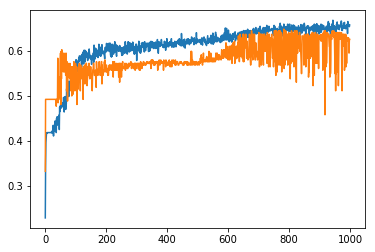

In [39]:
#model acc ve va_acc değerlerinin artış grafiği
plt.plot(egitim.history["acc"])
plt.plot(egitim.history["val_acc"])
plt.show()

In [41]:
#Model katmanlarının eğitilmesi
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=8))
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

#modelin compile edilmesi
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [42]:
#modelin fit edilmesi iterasyon sayı=2000
egitim=model.fit(x_train,y_train,epochs=2000,batch_size=128,validation_data=(x_test,y_test))

Train on 1047 samples, validate on 262 samples
Epoch 1/2000
1047/1047 [==============================] - 0s - loss: 2.2079 - acc: 0.3773 - val_loss: 2.0286 - val_acc: 0.4924
Epoch 2/2000
1047/1047 [==============================] - 0s - loss: 1.7139 - acc: 0.4183 - val_loss: 1.2572 - val_acc: 0.4924
Epoch 3/2000
1047/1047 [==============================] - 0s - loss: 1.1494 - acc: 0.4193 - val_loss: 1.0681 - val_acc: 0.5763
Epoch 4/2000
1047/1047 [==============================] - 0s - loss: 1.0677 - acc: 0.4327 - val_loss: 1.0170 - val_acc: 0.4924
Epoch 5/2000
1047/1047 [==============================] - 0s - loss: 1.0513 - acc: 0.4690 - val_loss: 1.0133 - val_acc: 0.4809
Epoch 6/2000
1047/1047 [==============================] - 0s - loss: 1.0342 - acc: 0.4776 - val_loss: 1.0085 - val_acc: 0.5840
Epoch 7/2000
1047/1047 [==============================] - 0s - loss: 1.0266 - acc: 0.5005 - val_loss: 1.0069 - val_acc: 0.5611
Epoch 8/2000
1047/1047 [==============================] - 0s - l

1047/1047 [==============================] - 0s - loss: 0.7906 - acc: 0.6609 - val_loss: 0.9173 - val_acc: 0.6221
Epoch 128/2000
1047/1047 [==============================] - 0s - loss: 0.8168 - acc: 0.6552 - val_loss: 0.8083 - val_acc: 0.6336
Epoch 129/2000
1047/1047 [==============================] - 0s - loss: 0.8027 - acc: 0.6485 - val_loss: 0.8596 - val_acc: 0.6221
Epoch 130/2000
1047/1047 [==============================] - 0s - loss: 0.8030 - acc: 0.6581 - val_loss: 0.8418 - val_acc: 0.6298
Epoch 131/2000
1047/1047 [==============================] - 0s - loss: 0.7953 - acc: 0.6648 - val_loss: 0.8219 - val_acc: 0.6260
Epoch 132/2000
1047/1047 [==============================] - 0s - loss: 0.7975 - acc: 0.6562 - val_loss: 0.8305 - val_acc: 0.6260
Epoch 133/2000
1047/1047 [==============================] - 0s - loss: 0.7812 - acc: 0.6686 - val_loss: 0.8520 - val_acc: 0.6260
Epoch 134/2000
1047/1047 [==============================] - 0s - loss: 0.8137 - acc: 0.6600 - val_loss: 0.8099 -

1047/1047 [==============================] - 0s - loss: 0.7447 - acc: 0.6753 - val_loss: 0.9496 - val_acc: 0.6031
Epoch 254/2000
1047/1047 [==============================] - 0s - loss: 0.8217 - acc: 0.6180 - val_loss: 0.8100 - val_acc: 0.6298
Epoch 255/2000
1047/1047 [==============================] - 0s - loss: 0.7839 - acc: 0.6571 - val_loss: 0.8136 - val_acc: 0.6336
Epoch 256/2000
1047/1047 [==============================] - 0s - loss: 0.7544 - acc: 0.6667 - val_loss: 0.8185 - val_acc: 0.6374
Epoch 257/2000
1047/1047 [==============================] - 0s - loss: 0.7693 - acc: 0.6743 - val_loss: 0.7797 - val_acc: 0.6450
Epoch 258/2000
1047/1047 [==============================] - 0s - loss: 0.7522 - acc: 0.6695 - val_loss: 0.7873 - val_acc: 0.6336
Epoch 259/2000
1047/1047 [==============================] - 0s - loss: 0.7605 - acc: 0.6648 - val_loss: 0.8255 - val_acc: 0.6260
Epoch 260/2000
1047/1047 [==============================] - 0s - loss: 0.7458 - acc: 0.6743 - val_loss: 0.8004 -

1047/1047 [==============================] - 0s - loss: 0.7219 - acc: 0.6858 - val_loss: 0.8026 - val_acc: 0.6260
Epoch 380/2000
1047/1047 [==============================] - 0s - loss: 0.7414 - acc: 0.6800 - val_loss: 0.7861 - val_acc: 0.6412
Epoch 381/2000
1047/1047 [==============================] - 0s - loss: 0.7252 - acc: 0.6858 - val_loss: 0.7920 - val_acc: 0.6298
Epoch 382/2000
1047/1047 [==============================] - 0s - loss: 0.7072 - acc: 0.6963 - val_loss: 0.7816 - val_acc: 0.6260
Epoch 383/2000
1047/1047 [==============================] - 0s - loss: 0.7333 - acc: 0.6839 - val_loss: 0.7694 - val_acc: 0.6260
Epoch 384/2000
1047/1047 [==============================] - 0s - loss: 0.7204 - acc: 0.6829 - val_loss: 0.7831 - val_acc: 0.6298
Epoch 385/2000
1047/1047 [==============================] - 0s - loss: 0.7303 - acc: 0.6781 - val_loss: 0.7909 - val_acc: 0.6489
Epoch 386/2000
1047/1047 [==============================] - 0s - loss: 0.7423 - acc: 0.6819 - val_loss: 0.7984 -

1047/1047 [==============================] - 0s - loss: 0.7191 - acc: 0.6877 - val_loss: 0.7777 - val_acc: 0.6336
Epoch 506/2000
1047/1047 [==============================] - 0s - loss: 0.7160 - acc: 0.6934 - val_loss: 0.7806 - val_acc: 0.6336
Epoch 507/2000
1047/1047 [==============================] - 0s - loss: 0.7138 - acc: 0.6896 - val_loss: 0.7900 - val_acc: 0.6298
Epoch 508/2000
1047/1047 [==============================] - 0s - loss: 0.7197 - acc: 0.6810 - val_loss: 0.8099 - val_acc: 0.6374
Epoch 509/2000
1047/1047 [==============================] - 0s - loss: 0.7245 - acc: 0.6810 - val_loss: 0.7662 - val_acc: 0.6412
Epoch 510/2000
1047/1047 [==============================] - 0s - loss: 0.7298 - acc: 0.6753 - val_loss: 0.8041 - val_acc: 0.6183
Epoch 511/2000
1047/1047 [==============================] - 0s - loss: 0.7216 - acc: 0.6839 - val_loss: 0.7977 - val_acc: 0.6412
Epoch 512/2000
1047/1047 [==============================] - 0s - loss: 0.7282 - acc: 0.6848 - val_loss: 0.7893 -

1047/1047 [==============================] - 0s - loss: 0.7289 - acc: 0.6800 - val_loss: 0.8042 - val_acc: 0.6412
Epoch 632/2000
1047/1047 [==============================] - 0s - loss: 0.7153 - acc: 0.6819 - val_loss: 0.7821 - val_acc: 0.6374
Epoch 633/2000
1047/1047 [==============================] - 0s - loss: 0.7321 - acc: 0.6839 - val_loss: 0.8096 - val_acc: 0.6298
Epoch 634/2000
1047/1047 [==============================] - 0s - loss: 0.7254 - acc: 0.6905 - val_loss: 0.7906 - val_acc: 0.6298
Epoch 635/2000
1047/1047 [==============================] - 0s - loss: 0.7075 - acc: 0.6982 - val_loss: 0.7839 - val_acc: 0.6450
Epoch 636/2000
1047/1047 [==============================] - 0s - loss: 0.7077 - acc: 0.6934 - val_loss: 0.7797 - val_acc: 0.6336
Epoch 637/2000
1047/1047 [==============================] - 0s - loss: 0.7089 - acc: 0.6819 - val_loss: 0.7949 - val_acc: 0.6298
Epoch 638/2000
1047/1047 [==============================] - 0s - loss: 0.7123 - acc: 0.6858 - val_loss: 0.7842 -

1047/1047 [==============================] - 0s - loss: 0.6977 - acc: 0.6972 - val_loss: 0.7859 - val_acc: 0.6412
Epoch 758/2000
1047/1047 [==============================] - 0s - loss: 0.7159 - acc: 0.6800 - val_loss: 0.7814 - val_acc: 0.6221
Epoch 759/2000
1047/1047 [==============================] - 0s - loss: 0.7111 - acc: 0.6953 - val_loss: 0.7721 - val_acc: 0.6450
Epoch 760/2000
1047/1047 [==============================] - 0s - loss: 0.7123 - acc: 0.6905 - val_loss: 0.8077 - val_acc: 0.6260
Epoch 761/2000
1047/1047 [==============================] - 0s - loss: 0.7151 - acc: 0.6953 - val_loss: 0.7785 - val_acc: 0.6412
Epoch 762/2000
1047/1047 [==============================] - 0s - loss: 0.7164 - acc: 0.6886 - val_loss: 0.7808 - val_acc: 0.6489
Epoch 763/2000
1047/1047 [==============================] - 0s - loss: 0.6911 - acc: 0.6953 - val_loss: 0.7922 - val_acc: 0.6298
Epoch 764/2000
1047/1047 [==============================] - 0s - loss: 0.7017 - acc: 0.6896 - val_loss: 0.7780 -

1047/1047 [==============================] - 0s - loss: 0.7116 - acc: 0.6762 - val_loss: 0.7760 - val_acc: 0.6374
Epoch 884/2000
1047/1047 [==============================] - 0s - loss: 0.7102 - acc: 0.6829 - val_loss: 0.7802 - val_acc: 0.6374
Epoch 885/2000
1047/1047 [==============================] - 0s - loss: 0.7116 - acc: 0.6781 - val_loss: 0.8207 - val_acc: 0.6336
Epoch 886/2000
1047/1047 [==============================] - 0s - loss: 0.7109 - acc: 0.6810 - val_loss: 0.8037 - val_acc: 0.6221
Epoch 887/2000
1047/1047 [==============================] - 0s - loss: 0.7317 - acc: 0.6848 - val_loss: 0.8072 - val_acc: 0.6298
Epoch 888/2000
1047/1047 [==============================] - 0s - loss: 0.7267 - acc: 0.6762 - val_loss: 0.8117 - val_acc: 0.6260
Epoch 889/2000
1047/1047 [==============================] - 0s - loss: 0.7304 - acc: 0.6886 - val_loss: 0.8177 - val_acc: 0.6260
Epoch 890/2000
1047/1047 [==============================] - 0s - loss: 0.7289 - acc: 0.6848 - val_loss: 0.7927 -

1047/1047 [==============================] - 0s - loss: 0.7009 - acc: 0.7011 - val_loss: 0.7812 - val_acc: 0.6450
Epoch 1010/2000
1047/1047 [==============================] - 0s - loss: 0.7360 - acc: 0.6819 - val_loss: 0.8370 - val_acc: 0.6298
Epoch 1011/2000
1047/1047 [==============================] - 0s - loss: 0.7267 - acc: 0.6848 - val_loss: 0.8020 - val_acc: 0.6260
Epoch 1012/2000
1047/1047 [==============================] - 0s - loss: 0.7064 - acc: 0.6934 - val_loss: 0.7807 - val_acc: 0.6374
Epoch 1013/2000
1047/1047 [==============================] - 0s - loss: 0.7054 - acc: 0.6982 - val_loss: 0.7822 - val_acc: 0.6298
Epoch 1014/2000
1047/1047 [==============================] - 0s - loss: 0.6949 - acc: 0.7011 - val_loss: 0.7945 - val_acc: 0.6336
Epoch 1015/2000
1047/1047 [==============================] - 0s - loss: 0.7127 - acc: 0.6867 - val_loss: 0.7786 - val_acc: 0.6450
Epoch 1016/2000
1047/1047 [==============================] - 0s - loss: 0.6910 - acc: 0.6944 - val_loss: 0

1047/1047 [==============================] - 0s - loss: 0.6916 - acc: 0.7077 - val_loss: 0.7859 - val_acc: 0.6450
Epoch 1136/2000
1047/1047 [==============================] - 0s - loss: 0.6965 - acc: 0.6944 - val_loss: 0.7754 - val_acc: 0.6527
Epoch 1137/2000
1047/1047 [==============================] - 0s - loss: 0.7023 - acc: 0.6905 - val_loss: 0.8094 - val_acc: 0.6221
Epoch 1138/2000
1047/1047 [==============================] - 0s - loss: 0.7152 - acc: 0.6810 - val_loss: 0.7937 - val_acc: 0.6527
Epoch 1139/2000
1047/1047 [==============================] - 0s - loss: 0.6935 - acc: 0.6944 - val_loss: 0.7913 - val_acc: 0.6374
Epoch 1140/2000
1047/1047 [==============================] - 0s - loss: 0.6950 - acc: 0.6934 - val_loss: 0.7793 - val_acc: 0.6489
Epoch 1141/2000
1047/1047 [==============================] - 0s - loss: 0.7036 - acc: 0.7030 - val_loss: 0.8021 - val_acc: 0.6221
Epoch 1142/2000
1047/1047 [==============================] - 0s - loss: 0.6894 - acc: 0.7096 - val_loss: 0

1047/1047 [==============================] - 0s - loss: 0.6851 - acc: 0.7058 - val_loss: 0.7643 - val_acc: 0.6527
Epoch 1262/2000
1047/1047 [==============================] - 0s - loss: 0.7049 - acc: 0.6934 - val_loss: 0.8043 - val_acc: 0.6489
Epoch 1263/2000
1047/1047 [==============================] - 0s - loss: 0.6973 - acc: 0.7077 - val_loss: 0.7940 - val_acc: 0.6412
Epoch 1264/2000
1047/1047 [==============================] - 0s - loss: 0.7001 - acc: 0.6953 - val_loss: 0.8221 - val_acc: 0.6374
Epoch 1265/2000
1047/1047 [==============================] - 0s - loss: 0.6945 - acc: 0.7049 - val_loss: 0.8327 - val_acc: 0.6183
Epoch 1266/2000
1047/1047 [==============================] - 0s - loss: 0.6895 - acc: 0.7087 - val_loss: 0.7888 - val_acc: 0.6374
Epoch 1267/2000
1047/1047 [==============================] - 0s - loss: 0.7022 - acc: 0.6934 - val_loss: 0.8175 - val_acc: 0.6298
Epoch 1268/2000
1047/1047 [==============================] - 0s - loss: 0.7013 - acc: 0.6972 - val_loss: 0

1047/1047 [==============================] - 0s - loss: 0.6883 - acc: 0.7068 - val_loss: 0.7811 - val_acc: 0.6450
Epoch 1388/2000
1047/1047 [==============================] - 0s - loss: 0.6975 - acc: 0.7011 - val_loss: 0.7964 - val_acc: 0.6298
Epoch 1389/2000
1047/1047 [==============================] - 0s - loss: 0.6942 - acc: 0.7077 - val_loss: 0.8210 - val_acc: 0.6374
Epoch 1390/2000
1047/1047 [==============================] - 0s - loss: 0.6969 - acc: 0.7058 - val_loss: 0.8083 - val_acc: 0.6527
Epoch 1391/2000
1047/1047 [==============================] - 0s - loss: 0.7006 - acc: 0.6991 - val_loss: 0.8230 - val_acc: 0.6374
Epoch 1392/2000
1047/1047 [==============================] - 0s - loss: 0.6942 - acc: 0.7087 - val_loss: 0.8178 - val_acc: 0.6336
Epoch 1393/2000
1047/1047 [==============================] - 0s - loss: 0.7074 - acc: 0.6867 - val_loss: 0.8014 - val_acc: 0.6412
Epoch 1394/2000
1047/1047 [==============================] - 0s - loss: 0.6919 - acc: 0.6972 - val_loss: 0

1047/1047 [==============================] - 0s - loss: 0.6883 - acc: 0.7077 - val_loss: 0.7909 - val_acc: 0.6450
Epoch 1514/2000
1047/1047 [==============================] - 0s - loss: 0.6782 - acc: 0.7058 - val_loss: 0.8031 - val_acc: 0.6374
Epoch 1515/2000
1047/1047 [==============================] - 0s - loss: 0.7005 - acc: 0.7039 - val_loss: 0.7881 - val_acc: 0.6489
Epoch 1516/2000
1047/1047 [==============================] - 0s - loss: 0.6909 - acc: 0.7096 - val_loss: 0.8324 - val_acc: 0.6374
Epoch 1517/2000
1047/1047 [==============================] - 0s - loss: 0.7222 - acc: 0.6925 - val_loss: 0.8031 - val_acc: 0.6298
Epoch 1518/2000
1047/1047 [==============================] - 0s - loss: 0.7258 - acc: 0.6839 - val_loss: 0.8465 - val_acc: 0.6221
Epoch 1519/2000
1047/1047 [==============================] - 0s - loss: 0.7246 - acc: 0.6925 - val_loss: 0.7986 - val_acc: 0.6412
Epoch 1520/2000
1047/1047 [==============================] - 0s - loss: 0.7163 - acc: 0.6934 - val_loss: 0

1047/1047 [==============================] - 0s - loss: 0.6965 - acc: 0.6982 - val_loss: 0.8105 - val_acc: 0.6450
Epoch 1640/2000
1047/1047 [==============================] - 0s - loss: 0.6823 - acc: 0.7106 - val_loss: 0.8122 - val_acc: 0.6374
Epoch 1641/2000
1047/1047 [==============================] - 0s - loss: 0.6828 - acc: 0.7039 - val_loss: 0.7963 - val_acc: 0.6412
Epoch 1642/2000
1047/1047 [==============================] - 0s - loss: 0.7174 - acc: 0.6858 - val_loss: 0.8150 - val_acc: 0.6298
Epoch 1643/2000
1047/1047 [==============================] - 0s - loss: 0.6964 - acc: 0.7030 - val_loss: 0.8071 - val_acc: 0.6260
Epoch 1644/2000
1047/1047 [==============================] - 0s - loss: 0.6985 - acc: 0.7077 - val_loss: 0.8222 - val_acc: 0.6260
Epoch 1645/2000
1047/1047 [==============================] - 0s - loss: 0.6962 - acc: 0.6982 - val_loss: 0.7917 - val_acc: 0.6260
Epoch 1646/2000
1047/1047 [==============================] - 0s - loss: 0.6821 - acc: 0.7068 - val_loss: 0

1047/1047 [==============================] - 0s - loss: 0.6896 - acc: 0.7125 - val_loss: 0.7924 - val_acc: 0.6374
Epoch 1766/2000
1047/1047 [==============================] - 0s - loss: 0.7054 - acc: 0.6982 - val_loss: 0.7720 - val_acc: 0.6489
Epoch 1767/2000
1047/1047 [==============================] - 0s - loss: 0.6996 - acc: 0.6944 - val_loss: 0.8181 - val_acc: 0.6298
Epoch 1768/2000
1047/1047 [==============================] - 0s - loss: 0.6981 - acc: 0.6944 - val_loss: 0.8105 - val_acc: 0.6336
Epoch 1769/2000
1047/1047 [==============================] - 0s - loss: 0.7016 - acc: 0.7001 - val_loss: 0.7852 - val_acc: 0.6336
Epoch 1770/2000
1047/1047 [==============================] - 0s - loss: 0.6963 - acc: 0.6972 - val_loss: 0.8062 - val_acc: 0.6336
Epoch 1771/2000
1047/1047 [==============================] - 0s - loss: 0.6948 - acc: 0.6991 - val_loss: 0.7877 - val_acc: 0.6450
Epoch 1772/2000
1047/1047 [==============================] - 0s - loss: 0.6844 - acc: 0.7173 - val_loss: 0

1047/1047 [==============================] - 0s - loss: 0.6880 - acc: 0.6934 - val_loss: 0.7919 - val_acc: 0.6412
Epoch 1892/2000
1047/1047 [==============================] - 0s - loss: 0.7076 - acc: 0.6905 - val_loss: 0.7984 - val_acc: 0.6336
Epoch 1893/2000
1047/1047 [==============================] - 0s - loss: 0.6914 - acc: 0.7030 - val_loss: 0.8222 - val_acc: 0.6260
Epoch 1894/2000
1047/1047 [==============================] - 0s - loss: 0.6980 - acc: 0.7011 - val_loss: 0.7858 - val_acc: 0.6450
Epoch 1895/2000
1047/1047 [==============================] - 0s - loss: 0.6897 - acc: 0.7011 - val_loss: 0.7778 - val_acc: 0.6489
Epoch 1896/2000
1047/1047 [==============================] - 0s - loss: 0.6958 - acc: 0.7001 - val_loss: 0.7616 - val_acc: 0.6641
Epoch 1897/2000
1047/1047 [==============================] - 0s - loss: 0.6972 - acc: 0.6896 - val_loss: 0.8137 - val_acc: 0.6298
Epoch 1898/2000
1047/1047 [==============================] - 0s - loss: 0.6896 - acc: 0.6953 - val_loss: 0

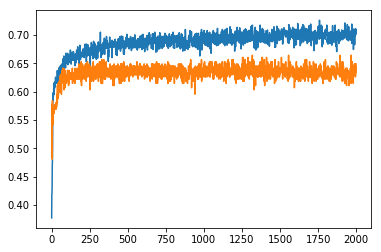

In [43]:
#model acc ve va_acc değerlerinin artış grafiği
plt.plot(egitim.history["acc"])
plt.plot(egitim.history["val_acc"])
plt.show()

In [44]:
import sklearn.metrics as metrics
y_test=y_test.reshape(-1,1)

y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

y_true=np.argmax(y_test,axis=1)
cm=metrics.confusion_matrix(y_pred,y_true)
print(cm)

[[159   0   0]
 [ 15   0   0]
 [ 88   0   0]]
